# ArbitraryNumberImputer
ArbitraryNumberImputer replaces NA by an arbitrary value. It works for numerical variables. The arbitrary value needs to be defined by the user.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from feature_engine.imputation  import ArbitraryNumberImputer

# Download the data from Kaggle and store it
# in the same folder as this notebook.

data = pd.read_csv(r'C:\Users\devanshu.tayal\Downloads\houseprices.csv')

data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500.0
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500.0
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500.0
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000.0
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000.0


In [2]:
# Separate the data into train and test sets.

X_train, X_test, y_train, y_test = train_test_split(
    data.drop(['Id', 'SalePrice'], axis=1),
    data['SalePrice'],
    test_size=0.3,
    random_state=0,
)

X_train.shape, X_test.shape

((2043, 79), (876, 79))

## Imputate variables with same number

In [3]:
# Check missing data

X_train[['LotFrontage', 'MasVnrArea']].isnull().mean()

LotFrontage    0.162996
MasVnrArea     0.006853
dtype: float64

In [4]:
# Let's create an instance of the imputer where we impute
# 2 variables with the same arbitraty number.

imputer = ArbitraryNumberImputer(
    arbitrary_number=-999,
    variables=['LotFrontage', 'MasVnrArea'],
)

imputer.fit(X_train)

ArbitraryNumberImputer(arbitrary_number=-999,
                       variables=['LotFrontage', 'MasVnrArea'])

In [5]:
# The number to use in the imputation
# is stored as parameter.

imputer.arbitrary_number

-999

In [6]:
# The imputer will use the same value to impute
# all indicated variables.

imputer.imputer_dict_

{'LotFrontage': -999, 'MasVnrArea': -999}

In [7]:
# Impute variables

train_t = imputer.transform(X_train)
test_t = imputer.transform(X_test)

# Sanity check: the min value is the one used for 
#  the imputation

train_t[['LotFrontage', 'MasVnrArea']].min()

LotFrontage   -999.0
MasVnrArea    -999.0
dtype: float64

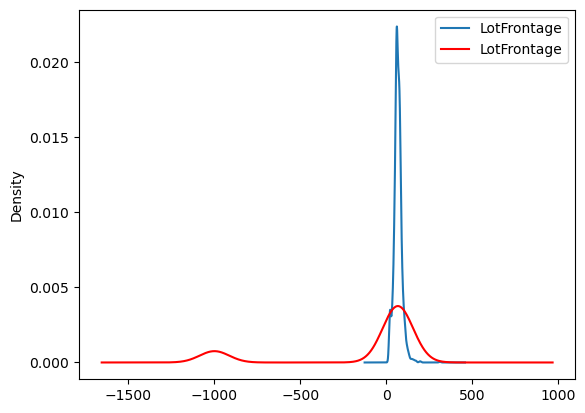

In [8]:
# The distribution of the variable
# changed with the transformation.

fig = plt.figure()
ax = fig.add_subplot(111)
X_train['LotFrontage'].plot(kind='kde', ax=ax)
train_t['LotFrontage'].plot(kind='kde', ax=ax, color='red')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

## Impute variables with different numbers
We can also impute different variables with different values. In this case, we need to start the transformer with a dictionary of variable to value pairs.

In [9]:
# Impute different variables with different values

imputer = ArbitraryNumberImputer(
    imputer_dict={"LotFrontage": -678, "MasVnrArea": -789}
)

imputer.fit(X_train)

ArbitraryNumberImputer(imputer_dict={'LotFrontage': -678, 'MasVnrArea': -789})

In [10]:
# In this case, the imputer_dict_ matches the 
# entered dictionary.

imputer.imputer_dict_

{'LotFrontage': -678, 'MasVnrArea': -789}

In [11]:
# Now we impute the missing data

train_t = imputer.transform(X_train)
test_t = imputer.transform(X_test)

# Sanity check: check minimum values

train_t[['LotFrontage', 'MasVnrArea']].min()

LotFrontage   -678.0
MasVnrArea    -789.0
dtype: float64

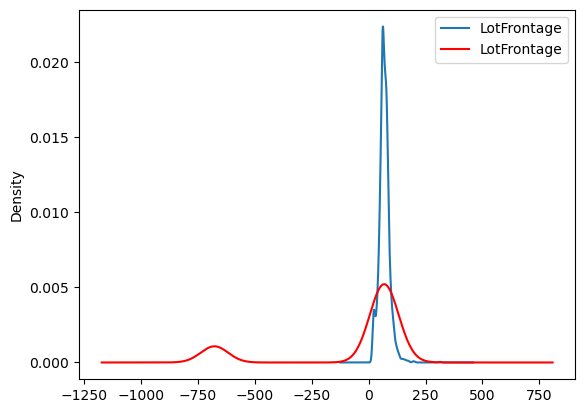

In [12]:
# The distribution of the variable changed
# after the transformation.

fig = plt.figure()
ax = fig.add_subplot(111)
X_train['LotFrontage'].plot(kind='kde', ax=ax)
train_t['LotFrontage'].plot(kind='kde', ax=ax, color='red')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

## Automatically select all variables
We can impute all numerical variables with the same value automatically with this transformer. We need to leave the parameter variables to None.

In [13]:
# Let's create an instance of the imputer where we impute
# 2 variables with the same arbitraty number.

imputer = ArbitraryNumberImputer(
    arbitrary_number=-1,
)

imputer.fit(X_train)

ArbitraryNumberImputer(arbitrary_number=-1)

In [14]:
# The imputer finds all numerical variables
# automatically.

imputer.variables_

['MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold']

In [15]:
# We find the imputation value in the dictionary

imputer.imputer_dict_

{'MSSubClass': -1,
 'LotFrontage': -1,
 'LotArea': -1,
 'OverallQual': -1,
 'OverallCond': -1,
 'YearBuilt': -1,
 'YearRemodAdd': -1,
 'MasVnrArea': -1,
 'BsmtFinSF1': -1,
 'BsmtFinSF2': -1,
 'BsmtUnfSF': -1,
 'TotalBsmtSF': -1,
 '1stFlrSF': -1,
 '2ndFlrSF': -1,
 'LowQualFinSF': -1,
 'GrLivArea': -1,
 'BsmtFullBath': -1,
 'BsmtHalfBath': -1,
 'FullBath': -1,
 'HalfBath': -1,
 'BedroomAbvGr': -1,
 'KitchenAbvGr': -1,
 'TotRmsAbvGrd': -1,
 'Fireplaces': -1,
 'GarageYrBlt': -1,
 'GarageCars': -1,
 'GarageArea': -1,
 'WoodDeckSF': -1,
 'OpenPorchSF': -1,
 'EnclosedPorch': -1,
 '3SsnPorch': -1,
 'ScreenPorch': -1,
 'PoolArea': -1,
 'MiscVal': -1,
 'MoSold': -1,
 'YrSold': -1}

In [16]:
# now we impute the missing data

train_t = imputer.transform(X_train)
test_t = imputer.transform(X_test)

# Sanity check:

# No numerical variable with NA is  left in the
# transformed data.

[v for v in train_t.columns if train_t[v].dtypes !=
    'O' and train_t[v].isnull().sum() > 1]

[]

In [17]:
# New: we can get the name of the features in the final output
imputer.get_feature_names_out()

['MSSubClass',
 'MSZoning',
 'LotFrontage',
 'LotArea',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'MasVnrArea',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinSF1',
 'BsmtFinType2',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'KitchenQual',
 'TotRmsAbvGrd',
 'Functional',
 'Fireplaces',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageCars',
 'GarageArea',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'WoodDeckSF',
 'OpenPorchSF',
 'Enc